<a href="https://colab.research.google.com/github/Tonniah/TW/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 Loading and inspecting data in a typical data preprocessing or data analysis workflow

In [10]:
import pandas as pd
#Load dataset (Assume you have the 'HateSpeech_Kenya.csv' file)
data = pd.read_csv('HateSpeech_Kenya.csv')
#Display the first few rows of the dataset
print(data.head())


   hate_speech  offensive_language  neither  Class  \
0            0                   0        3      0   
1            0                   0        3      0   
2            0                   0        3      0   
3            0                   0        3      0   
4            0                   0        3      0   

                                               Tweet  
0  ['The political elite are in desperation. Ordi...  
1  ["Am just curious the only people who are call...  
2  ['USERNAME_3 the area politicians are the one ...  
3  ['War expected in Nakuru if something is not d...  
4  ['USERNAME_4 tells kikuyus activists that they...  


In [11]:
print(data.tail())


       hate_speech  offensive_language  neither  Class  \
48071            0                   0        2      0   
48072            0                   0        2      0   
48073            0                   0        2      0   
48074            1                   0        2      0   
48075            0                   1        2      0   

                                                   Tweet  
48071  ['This is exactly what Moses Kuria & ilk are d...  
48072  ['This is exactly what Kenyans are going throu...  
48073  ["This is exactly what is wrong with this coun...  
48074  ["This is exactly the same thing. Well the onl...  
48075  ['This is exactly how Luos feel in this countr...  


Step 2:We check for missing values

In [12]:
print(data.isnull().sum())



hate_speech           0
offensive_language    0
neither               0
Class                 0
Tweet                 0
dtype: int64


Step 3:Checking summary statistics

In [13]:
print(data.describe())

        hate_speech  offensive_language       neither         Class
count  48076.000000        48076.000000  48076.000000  48076.000000
mean       0.256719            0.669690      2.110138      0.310030
std        0.628820            0.846868      1.020536      0.588431
min        0.000000            0.000000      0.000000      0.000000
25%        0.000000            0.000000      2.000000      0.000000
50%        0.000000            0.000000      2.000000      0.000000
75%        0.000000            1.000000      3.000000      0.000000
max        6.000000            6.000000      8.000000      2.000000


Step 4:
Perfoming corrlation analysis on tweets

removing special characters,
URL and emoji
Lowering texts
Removing stop words eg the , is
Tokenization(splitting text into word)
Stemming or lemmatization(reducing words to their root form)

In [14]:
!pip install langdetect # install the missing module
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import emoji # The emoji module is now available
from langdetect import detect

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Step 5: Define the Tweet Cleaning Function
Here’s a function to clean the tweets by removing URLs, usernames, and punctuation, and converting the tweet into a numerical form (the length of each word):

In [15]:

   def process_tweet(tweet): # Add tweet as an argument to the function definition
    # Remove URLs
    Tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove usernames
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Convert emojis to text
    tweet = emoji.demojize(tweet)

    # Tokenize the tweet
    tokens = word_tokenize(tweet)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Convert to numerical form (word length in this case)
    numerical_tweet = ' '.join([str(len(word)) for word in tokens])

    return ' '.join(tokens), numerical_tweet

Step 6:Handling missing values for numeerical columns by filling them with the median of the
column

In [19]:
# Fill missing values in 'hate_speech' with the median
data['hate_speech'].fillna(data['hate_speech'].median(), inplace=True)

Step 7:Handle missing values for categorical column eg ['Tweet'] by filling them with the most
frequent value (mode)

In [20]:
#Fill missing values in 'tweet' with the most frequent value
data['Tweet'].fillna(data['Tweet'].mode()[0], inplace=True)


Step 8:Drop rows with missing targert variable data(if applicable,such as in the
'offensive_language' column


In [21]:
#Drop rows with missing target values(optional)
data.dropna(subset=['offensive_language'], inplace=True)

Step 9:Scaling numerical data identity numerical features eg ('offensive_language',
'Hate_speech') and apply standard scaling(z-score normalization) to mormalize the values

In [22]:
from sklearn.preprocessing import StandardScaler
#Define the numerical column to scale
numerical_cols = ['offensive_language', 'hate_speech']
#initialize the scaler
scaler = StandardScaler()
#Scale numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


Step 10:Encoding categorical variables,convert categorical variables into format using one hot
encoding.Focus on column like'class'

In [23]:
# One-hot encode only the 'Class' column if it's categorical
data = pd.get_dummies(data, columns=['Class'], drop_first=True)

Step 11:verify that categorical column have been successfully encoded into numerical values

In [25]:
print(data.head())

   hate_speech  offensive_language  neither  \
0    -0.408258           -0.790792        3   
1    -0.408258           -0.790792        3   
2    -0.408258           -0.790792        3   
3    -0.408258           -0.790792        3   
4    -0.408258           -0.790792        3   

                                               Tweet  Class_1  Class_2  
0  ['The political elite are in desperation. Ordi...    False    False  
1  ["Am just curious the only people who are call...    False    False  
2  ['USERNAME_3 the area politicians are the one ...    False    False  
3  ['War expected in Nakuru if something is not d...    False    False  
4  ['USERNAME_4 tells kikuyus activists that they...    False    False  


In [26]:
print(data.tail())


       hate_speech  offensive_language  neither  \
48071    -0.408258           -0.790792        2   
48072    -0.408258           -0.790792        2   
48073    -0.408258           -0.790792        2   
48074     1.182037           -0.790792        2   
48075    -0.408258            0.390042        2   

                                                   Tweet  Class_1  Class_2  
48071  ['This is exactly what Moses Kuria & ilk are d...    False    False  
48072  ['This is exactly what Kenyans are going throu...    False    False  
48073  ["This is exactly what is wrong with this coun...    False    False  
48074  ["This is exactly the same thing. Well the onl...    False    False  
48075  ['This is exactly how Luos feel in this countr...    False    False  


Step 12: plot a histogram

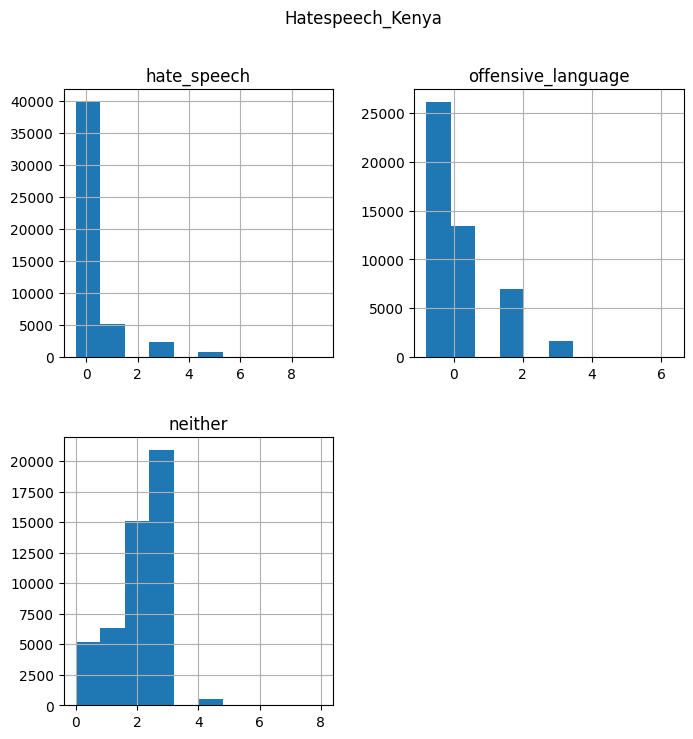

In [27]:
import matplotlib.pyplot as plt
#plot histogram for each feature
data.hist(figsize=(8,8))
plt.suptitle("Hatespeech_Kenya")
plt.show()

Step 13:Splitting data into training and testing sets separates the target 'offensive_language'
from the feature variables

In [20]:
import pandas as pd


data = pd.read_csv('HateSpeech_Kenya.csv')

x = data.drop('offensive_language', axis=1)
y = data['offensive_language']

Step 14:split the database into training and testing sets using an 80/20 split

In [22]:
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

Training set size: (38460, 4)
Testing set size: (9616, 4)


Step 15:Tweet column cleaned and before

In [25]:
# Load your dataset
file_path = 'HateSpeech_Kenya.csv'
data = pd.read_csv(file_path)


def clean_tweet(tweet):

    cleaned_tweet = tweet.lower()
    numerical_tweet = 1
    return cleaned_tweet, numerical_tweet

# Apply the clean_tweet function to the 'Tweet' column
data['Cleaned_Tweet'], data['Numerical_Tweet'] = zip(*data['Tweet'].apply(clean_tweet))

# Display the cleaned data
cleaned_data = data[['Tweet', 'Cleaned_Tweet', 'Numerical_Tweet']]
print(cleaned_data.head())


                                               Tweet  \
0  ['The political elite are in desperation. Ordi...   
1  ["Am just curious the only people who are call...   
2  ['USERNAME_3 the area politicians are the one ...   
3  ['War expected in Nakuru if something is not d...   
4  ['USERNAME_4 tells kikuyus activists that they...   

                                       Cleaned_Tweet  Numerical_Tweet  
0  ['the political elite are in desperation. ordi...                1  
1  ["am just curious the only people who are call...                1  
2  ['username_3 the area politicians are the one ...                1  
3  ['war expected in nakuru if something is not d...                1  
4  ['username_4 tells kikuyus activists that they...                1  


Summary: In this data preprocessing framework, the first step carried out was to load the
HateSpeech_Kenya dataset and took a quick look at the dataset to get some information about
the structure of the data and the type of data it possesses. We also checked for any
observations which contain missing values and found out that there were none hence reducing
the problem of missing values in the dataset. Basic summaries regarding tabular data analysis
gave information on the kind of distribution of numerical variables including the hate_speech,
and the offensive_language.
Subsequently, we addressed the missing value problem by using the median to replace
numerical variables, for instance hatespeech and using the mode to represent categorical
variable such as Tweet. In preparation of the data for modeling, scaling was done on the
numerical columns with the help of StandardScaler with the purpose of normalizing the data.
Then we also converted the Class column into numerical format using the one hot encoder.
And we cleaned the dataset of tweets by:

Removing URLs, usernames, and punctuations.
Converting the cleaned tweet to a numerical form (based on word length).
Displaying the original tweet and the cleaned version in two columns.
Last, the data set was divided into the training and test data for model assessment with the
training data containing 38,460 samples and testing data containing 9,616 samples.
